In [1]:
!pip install pycaret

     |████████████████████████████████| 263 kB 4.9 MB/s 
     |████████████████████████████████| 248 kB 9.2 MB/s 
     |████████████████████████████████| 1.7 MB 9.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 2.0 MB 27.9 MB/s 
     |████████████████████████████████| 167 kB 57.5 MB/s 
     |████████████████████████████████| 6.8 MB 58.2 MB/s 
     |████████████████████████████████| 105 kB 48.5 MB/s 
     |████████████████████████████████| 1.3 MB 34.9 MB/s 
     |████████████████████████████████| 14.4 MB 58 kB/s 
     |████████████████████████████████| 80 kB 8.3 MB/s 
     |████████████████████████████████| 271 kB 54.5 MB/s 
     |████████████████████████████████| 636 kB 48.6 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |███████████████████████

In [2]:
!pip install python-dotenv

In [3]:
!pip install boto3

     |████████████████████████████████| 131 kB 5.0 MB/s 
     |████████████████████████████████| 7.7 MB 44.7 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 138 kB 49.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data/creditcard.csv")

In [6]:
data_unseen = df.sample(frac=0.1, random_state=42)     
df = df.drop(data_unseen.index)                       

df.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [7]:
import mlflow
mlflow.set_tracking_uri("")


In [8]:
from pycaret.classification import *
df_proccess = setup(data=df, target = 'Class', train_size=0.8, polynomial_features=True, fix_imbalance = True, log_experiment = True, log_plots = True, 
                    experiment_name = 'Credit Card Fraud - Expt 2')

,Description,Value
0,session_id,1486
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(256326, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
top2 = compare_models(sort = 'F1',n_select = 2,exclude = ['rf', 'gbc','ada','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9654,0.8083,0.9013,0.8514,0.8511,0.8528,43.308
lightgbm,Light Gradient Boosting Machine,0.9992,0.9651,0.8193,0.7564,0.7855,0.7851,0.7863,9.232
dt,Decision Tree Classifier,0.9979,0.8758,0.7532,0.4443,0.5577,0.5567,0.5769,39.828
nb,Naive Bayes,0.9928,0.9641,0.8302,0.1770,0.2917,0.2896,0.3813,0.478
ridge,Ridge Classifier,0.9901,0.0000,0.8631,0.1377,0.2375,0.2351,0.3424,0.500
lda,Linear Discriminant Analysis,0.9901,0.9815,0.8631,0.1377,0.2375,0.2351,0.3424,3.170
qda,Quadratic Discriminant Analysis,0.9871,0.9665,0.8492,0.1071,0.1902,0.1876,0.2988,1.598
lr,Logistic Regression,0.9794,0.9683,0.8768,0.0721,0.1331,0.1303,0.2478,9.653
knn,K Neighbors Classifier,0.9780,0.7935,0.5834,0.0467,0.0865,0.0835,0.1607,5.333


In [10]:
tuned_top_1 = tune_model(top2[0],optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9989,0.9476,0.7222,0.6667,0.6933,0.6928,0.6933
1,0.9990,0.9364,0.6944,0.7143,0.7042,0.7037,0.7038
2,0.9990,0.9591,0.7500,0.7105,0.7297,0.7292,0.7295
3,0.9988,0.9735,0.6667,0.6667,0.6667,0.6661,0.6661
4,0.9989,0.9551,0.7500,0.6585,0.7013,0.7007,0.7022
5,0.9988,0.9557,0.6757,0.6579,0.6667,0.6661,0.6661
6,0.9991,0.9867,0.7838,0.7250,0.7532,0.7528,0.7534
7,0.9990,0.9527,0.6757,0.7353,0.7042,0.7037,0.7043
8,0.9987,0.9634,0.6486,0.6486,0.6486,0.6480,0.6480
9,0.9993,0.9865,0.7838,0.8286,0.8056,0.8052,0.8055


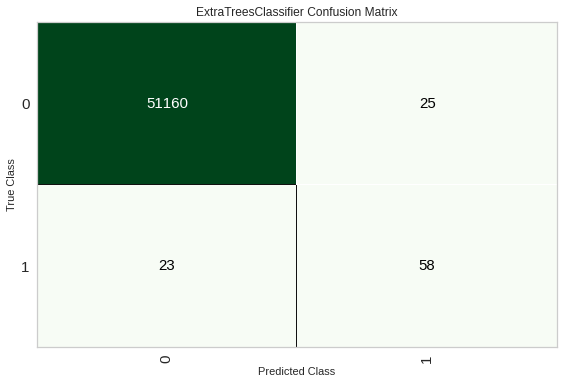

In [11]:
plot_model(tuned_top_1,'confusion_matrix')

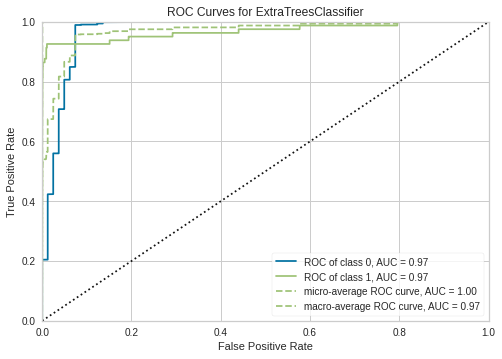

In [12]:
plot_model(tuned_top_1,'auc')

In [13]:
tuned_top_2 = tune_model(top2[1],optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9684,0.8333,0.8108,0.8219,0.8216,0.8217
1,0.9995,0.9620,0.7778,0.9032,0.8358,0.8356,0.8379
2,0.9992,0.9726,0.8056,0.7436,0.7733,0.7729,0.7735
3,0.9993,0.9871,0.8333,0.7692,0.8000,0.7996,0.8003
4,0.9991,0.9813,0.8611,0.7045,0.7750,0.7746,0.7785
5,0.9993,0.9855,0.8378,0.7750,0.8052,0.8048,0.8054
6,0.9996,0.9828,0.8649,0.8889,0.8767,0.8765,0.8766
7,0.9993,0.9654,0.7838,0.8286,0.8056,0.8052,0.8055
8,0.9991,0.9891,0.7568,0.7568,0.7568,0.7563,0.7563
9,0.9996,0.9922,0.8649,0.8889,0.8767,0.8765,0.8766


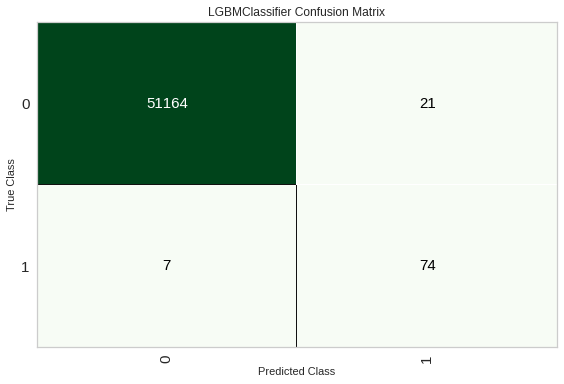

In [14]:
plot_model(tuned_top_2,'confusion_matrix')

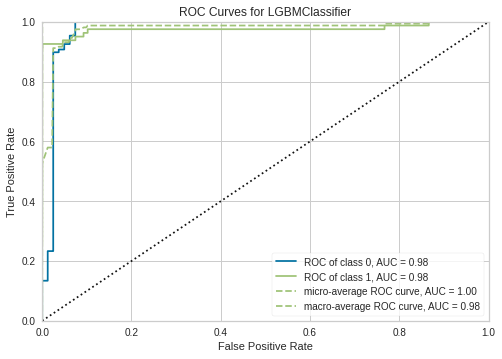

In [15]:
plot_model(tuned_top_2,'auc')

In [16]:
predict_model(tuned_top_1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9991,0.969,0.716,0.6988,0.7073,0.7068,0.7069


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,V14_Power2,V12_Power2,V9_Power2,V16_Power2,V18_Power2,V17_Power2,Class,Label,Score
0,165908.0,-0.429649,0.280588,0.375446,-1.662680,-0.460717,-0.810480,0.325131,-0.938603,-0.888498,-0.549397,-0.647578,-1.403390,-0.907177,-1.416670,-0.152815,1.584448,1.174877,-1.107602,0.490659,-0.176432,0.420762,-1.342231,0.244937,-0.224222,-0.241442,-0.646656,0.116979,0.007569,99.000000,2.006954,1.969505,0.789428,2.510477,1.226783,1.380335,0,0,0.5997
1,170375.0,-0.668726,0.267670,-0.566598,-0.274168,0.334368,-1.028663,2.132333,-0.825006,0.094350,-0.841302,-0.299192,-0.128193,0.511435,-1.297141,0.527259,0.231148,0.070439,0.534924,-0.565195,-0.449412,0.102476,1.038655,0.225278,0.005507,0.123622,-0.196650,-0.072343,-0.323807,212.580002,1.682574,0.016433,0.008902,0.053429,0.286144,0.004962,0,0,0.6137
2,54494.0,1.234651,0.359840,-0.118968,1.002900,-0.018931,-0.898823,0.360789,-0.135080,-0.343214,0.252522,1.115306,0.219033,-1.376155,1.016528,0.122929,0.040364,-0.490551,0.283631,0.046279,-0.227998,0.039265,0.073555,-0.141904,0.315042,0.779541,-0.309353,-0.020038,-0.002132,0.890000,1.033328,0.047976,0.117796,0.001629,0.080447,0.240641,0,0,0.6136
3,66786.0,-1.514226,1.503161,0.862357,0.072974,-0.760270,-0.424051,-0.190966,1.034593,-0.372222,-0.428313,0.489739,0.828390,-0.714280,0.694031,-1.118062,0.028562,0.171138,0.096929,0.642113,-0.035779,-0.089939,-0.258262,-0.056545,0.333740,0.028718,0.233537,0.173200,0.087735,7.800000,0.481679,0.686230,0.138549,0.000816,0.009395,0.029288,0,0,0.6119
4,80836.0,1.179881,0.312858,0.437421,1.375927,-0.039510,-0.156000,0.134561,-0.077016,0.121664,-0.154250,-0.344995,1.126759,0.990917,-0.159469,-0.218138,-0.776809,0.199185,-1.117539,-0.372931,-0.133324,-0.093379,0.039509,-0.068923,0.125243,0.703945,-0.315786,0.048618,0.017166,1.000000,0.025430,1.269585,0.014802,0.603432,1.248894,0.039675,0,0,0.6078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51261,75730.0,-1.238229,0.368517,0.539961,0.637308,0.669802,-0.082359,0.450628,0.471694,-0.792955,-0.706475,-1.184288,0.135098,0.583492,0.545894,0.871920,0.119408,-0.328197,-0.282912,-0.254618,0.210602,0.085373,-0.237626,0.162216,-0.803584,-0.324713,-0.576443,0.035090,-0.000286,100.449997,0.298000,0.018252,0.628777,0.014258,0.080039,0.107713,0,0,0.6268
51262,34449.0,-3.298601,1.930525,0.225922,0.084752,-1.420694,0.903456,-1.434375,1.580498,1.872666,0.596167,-2.311589,0.546874,-0.119948,-0.568217,-1.117038,-0.373863,0.695358,-0.271739,0.278234,-0.096920,0.097440,0.688348,0.113571,-0.702460,-0.003455,0.536319,-0.268661,0.284982,10.440000,0.322871,0.299071,3.506878,0.139773,0.073842,0.483523,0,0,0.6160
51263,153429.0,1.912807,-0.054928,-1.854744,0.518471,0.368018,-0.900247,0.312922,-0.266804,0.459281,-0.500635,-0.461143,0.175142,0.160422,-1.043787,0.222732,0.377287,0.636467,-0.226068,-0.016056,0.022182,-0.322582,-1.003504,0.267193,0.557863,-0.289128,0.160652,-0.075103,-0.011238,83.779999,1.089491,0.030675,0.210939,0.142345,0.051107,0.405090,0,0,0.6132
51264,76389.0,0.616762,-1.950463,0.947271,-0.244852,-2.194962,-0.358934,-0.780674,-0.059610,-0.263778,0.450474,-0.575589,-0.129823,0.652357,-0.329694,1.546127,-0.571542,-0.348555,1.692573,-1.294846,0.310949,0.060566,-0.148239,-0.248836,0.456997,-0.175147,1.074428,-0.071399,0.091951,378.000000,0.108698,0.016854,0.069579,0.326660,2.864804,0.121490,0,0,0.6106


In [17]:
predict_model(tuned_top_2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9995,0.9759,0.9136,0.7789,0.8409,0.8406,0.8433


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,V14_Power2,V12_Power2,V9_Power2,V16_Power2,V18_Power2,V17_Power2,Class,Label,Score
0,165908.0,-0.429649,0.280588,0.375446,-1.662680,-0.460717,-0.810480,0.325131,-0.938603,-0.888498,-0.549397,-0.647578,-1.403390,-0.907177,-1.416670,-0.152815,1.584448,1.174877,-1.107602,0.490659,-0.176432,0.420762,-1.342231,0.244937,-0.224222,-0.241442,-0.646656,0.116979,0.007569,99.000000,2.006954,1.969505,0.789428,2.510477,1.226783,1.380335,0,0,0.9996
1,170375.0,-0.668726,0.267670,-0.566598,-0.274168,0.334368,-1.028663,2.132333,-0.825006,0.094350,-0.841302,-0.299192,-0.128193,0.511435,-1.297141,0.527259,0.231148,0.070439,0.534924,-0.565195,-0.449412,0.102476,1.038655,0.225278,0.005507,0.123622,-0.196650,-0.072343,-0.323807,212.580002,1.682574,0.016433,0.008902,0.053429,0.286144,0.004962,0,0,0.9998
2,54494.0,1.234651,0.359840,-0.118968,1.002900,-0.018931,-0.898823,0.360789,-0.135080,-0.343214,0.252522,1.115306,0.219033,-1.376155,1.016528,0.122929,0.040364,-0.490551,0.283631,0.046279,-0.227998,0.039265,0.073555,-0.141904,0.315042,0.779541,-0.309353,-0.020038,-0.002132,0.890000,1.033328,0.047976,0.117796,0.001629,0.080447,0.240641,0,0,0.9999
3,66786.0,-1.514226,1.503161,0.862357,0.072974,-0.760270,-0.424051,-0.190966,1.034593,-0.372222,-0.428313,0.489739,0.828390,-0.714280,0.694031,-1.118062,0.028562,0.171138,0.096929,0.642113,-0.035779,-0.089939,-0.258262,-0.056545,0.333740,0.028718,0.233537,0.173200,0.087735,7.800000,0.481679,0.686230,0.138549,0.000816,0.009395,0.029288,0,0,0.9999
4,80836.0,1.179881,0.312858,0.437421,1.375927,-0.039510,-0.156000,0.134561,-0.077016,0.121664,-0.154250,-0.344995,1.126759,0.990917,-0.159469,-0.218138,-0.776809,0.199185,-1.117539,-0.372931,-0.133324,-0.093379,0.039509,-0.068923,0.125243,0.703945,-0.315786,0.048618,0.017166,1.000000,0.025430,1.269585,0.014802,0.603432,1.248894,0.039675,0,0,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51261,75730.0,-1.238229,0.368517,0.539961,0.637308,0.669802,-0.082359,0.450628,0.471694,-0.792955,-0.706475,-1.184288,0.135098,0.583492,0.545894,0.871920,0.119408,-0.328197,-0.282912,-0.254618,0.210602,0.085373,-0.237626,0.162216,-0.803584,-0.324713,-0.576443,0.035090,-0.000286,100.449997,0.298000,0.018252,0.628777,0.014258,0.080039,0.107713,0,0,0.9999
51262,34449.0,-3.298601,1.930525,0.225922,0.084752,-1.420694,0.903456,-1.434375,1.580498,1.872666,0.596167,-2.311589,0.546874,-0.119948,-0.568217,-1.117038,-0.373863,0.695358,-0.271739,0.278234,-0.096920,0.097440,0.688348,0.113571,-0.702460,-0.003455,0.536319,-0.268661,0.284982,10.440000,0.322871,0.299071,3.506878,0.139773,0.073842,0.483523,0,0,0.9999
51263,153429.0,1.912807,-0.054928,-1.854744,0.518471,0.368018,-0.900247,0.312922,-0.266804,0.459281,-0.500635,-0.461143,0.175142,0.160422,-1.043787,0.222732,0.377287,0.636467,-0.226068,-0.016056,0.022182,-0.322582,-1.003504,0.267193,0.557863,-0.289128,0.160652,-0.075103,-0.011238,83.779999,1.089491,0.030675,0.210939,0.142345,0.051107,0.405090,0,0,0.9998
51264,76389.0,0.616762,-1.950463,0.947271,-0.244852,-2.194962,-0.358934,-0.780674,-0.059610,-0.263778,0.450474,-0.575589,-0.129823,0.652357,-0.329694,1.546127,-0.571542,-0.348555,1.692573,-1.294846,0.310949,0.060566,-0.148239,-0.248836,0.456997,-0.175147,1.074428,-0.071399,0.091951,378.000000,0.108698,0.016854,0.069579,0.326660,2.864804,0.121490,0,0,0.9998


In [18]:
!mlflow ui

[2021-07-24 07:18:48 +0000] [4729] [INFO] Starting gunicorn 20.1.0
[2021-07-24 07:18:48 +0000] [4729] [INFO] Listening at: http://127.0.0.1:5000 (4729)
[2021-07-24 07:18:48 +0000] [4729] [INFO] Using worker: sync
[2021-07-24 07:18:48 +0000] [4732] [INFO] Booting worker with pid: 4732
[2021-07-24 07:32:25 +0000] [4729] [INFO] Handling signal: int
[2021-07-24 07:32:25 +0000] [4732] [INFO] Worker exiting (pid: 4732)

Aborted!
[2021-07-24 07:32:25 +0000] [4729] [INFO] Shutting down: Master


In [19]:
final_model1 = finalize_model(tuned_top_1)
final_model2 = finalize_model(tuned_top_2)

Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations
Finished loading model, total used 190 iterations


In [20]:
save_model(final_model1, "et_expt")
save_model(final_model2, "lightgbm_expt")

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.05,
                                 max_depth=-1, min_child_samples=36,
                                 min_child_weight=

In [21]:
import boto3
from pycaret.classification import *

import dotenv

dotenv.load_dotenv("/content/drive/MyDrive/data/.env")


deploy_model(model = final_model1, model_name = 'et_deployed', platform = 'aws', authentication = {'bucket' : 'lsmlops200020065'})
deploy_model(model = final_model2, model_name = 'lightgbm_deployed', platform = 'aws', authentication = {'bucket' : 'lsmlops200020065'})


Model Successfully Deployed on AWS S3
